In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chethuhn/network-intrusion-dataset")

print("Path to dataset files:", path)

100%|██████████| 230M/230M [00:03<00:00, 75.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/chethuhn/network-intrusion-dataset/versions/1


In [2]:
import kagglehub
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV

# Define all file names
all_files = [
    "Friday-WorkingHours-Morning.pcap_ISCX.csv",
    "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "Wednesday-workingHours.pcap_ISCX.csv",
    "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "Monday-WorkingHours.pcap_ISCX.csv",
    "Tuesday-WorkingHours.pcap_ISCX.csv",
    "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
]

In [3]:
# Combine all CSV files into a single dataframe
dataframes = []
for file in all_files:
    # Make sure to replace with the correct file path
    df = pd.read_csv(os.path.join(path, file))
    dataframes.append(df)

In [4]:
# Concatenate all dataframes
df = pd.concat(dataframes, ignore_index=True)

In [5]:
# Data cleaning: Replace infinity with NaN and drop rows with NaN values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [6]:
# Extract features and labels
X = np.array(df.drop(columns=' Label'))
y = np.array(df[' Label'])

In [7]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [8]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [10]:
# Build the neural network model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(y)), activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Set up EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [13]:
# Train the model with validation split and early stopping
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=2, callbacks=[early_stopping])

Epoch 1/20
24744/24744 - 66s - 3ms/step - accuracy: 0.9565 - loss: 0.1338 - val_accuracy: 0.9687 - val_loss: 0.0771
Epoch 2/20
24744/24744 - 55s - 2ms/step - accuracy: 0.9648 - loss: 0.0966 - val_accuracy: 0.9704 - val_loss: 0.0724
Epoch 3/20
24744/24744 - 55s - 2ms/step - accuracy: 0.9665 - loss: 0.0910 - val_accuracy: 0.9729 - val_loss: 0.0649
Epoch 4/20
24744/24744 - 81s - 3ms/step - accuracy: 0.9677 - loss: 0.0888 - val_accuracy: 0.9757 - val_loss: 0.0625
Epoch 5/20
24744/24744 - 80s - 3ms/step - accuracy: 0.9687 - loss: 0.0889 - val_accuracy: 0.9746 - val_loss: 0.0679
Epoch 6/20
24744/24744 - 84s - 3ms/step - accuracy: 0.9693 - loss: 0.0855 - val_accuracy: 0.9734 - val_loss: 0.0650
Epoch 7/20
24744/24744 - 53s - 2ms/step - accuracy: 0.9699 - loss: 0.0849 - val_accuracy: 0.9750 - val_loss: 0.0606
Epoch 8/20
24744/24744 - 54s - 2ms/step - accuracy: 0.9700 - loss: 0.0852 - val_accuracy: 0.9753 - val_loss: 0.0590
Epoch 9/20
24744/24744 - 81s - 3ms/step - accuracy: 0.9705 - loss: 0.085

In [14]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {accuracy*100:.2f}%")

26512/26512 - 38s - 1ms/step - accuracy: 0.9804 - loss: 0.0512
Test Accuracy: 98.04%


In [15]:
# Make predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

26512/26512 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step


In [16]:
# Classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                            precision    recall  f1-score   support

                    BENIGN       0.98      0.99      0.99    681289
                       Bot       0.00      0.00      0.00       559
                      DDoS       1.00      0.98      0.99     38540
             DoS GoldenEye       0.96      0.97      0.97      3088
                  DoS Hulk       0.99      0.89      0.94     68991
          DoS Slowhttptest       0.83      0.85      0.84      1643
             DoS slowloris       0.72      0.94      0.81      1735
               FTP-Patator       0.97      0.99      0.98      2300
                Heartbleed       0.00      0.00      0.00         1
              Infiltration       0.00      0.00      0.00         9
                  PortScan       0.91      0.98      0.94     47782
               SSH-Patator       0.84      0.98      0.90      1767
  Web Attack � Brute Force       0.00      0.00      0.00       464
Web Attack � Sql Injection       0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[675380      0     33    118    317    233    349     74      0      0
    4494    291      0      0      0]
 [   559      0      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [   567      0  37954      7      1      0     11      0      0      0
       0      0      0      0      0]
 [    69      0      0   3003      0      1     15      0      0      0
       0      0      0      0      0]
 [  7409      0      0      1  61577      0      4      0      0      0
       0      0      0      0      0]
 [    11      0      0      1      0   1400    229      0      0      0
       0      2      0      0      0]
 [    47      0      0      0      0     51   1636      0      0      0
       0      1      0      0      0]
 [    10      0      0      0      0      0     15   2274      0      0
       0      1      0      0      0]
 [     1      0      0      0      0      0      0      0      0      0
       0      0      0      0 

In [18]:
# Calculate FPR and FNR
FP = cm.sum(axis=0) - np.diag(cm)  # False Positives
FN = cm.sum(axis=1) - np.diag(cm)  # False Negatives
TP = np.diag(cm)                   # True Positives
TN = cm.sum() - (FP + FN + TP)     # True Negatives

# False Positive Rate and False Negative Rate
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

print(f"False Positive Rates: {FPR}")
print(f"False Negative Rates: {FNR}")

False Positive Rates: [6.17450950e-02 0.00000000e+00 4.07496453e-05 1.53796102e-04
 4.09303901e-04 3.36592971e-04 7.63026973e-04 8.86458810e-05
 0.00000000e+00 0.00000000e+00 5.61467234e-03 3.98064720e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
False Negative Rates: [0.00867326 1.         0.01520498 0.02752591 0.10746329 0.14790018
 0.05706052 0.01130435 1.         1.         0.02113767 0.02037351
 1.         1.         1.        ]


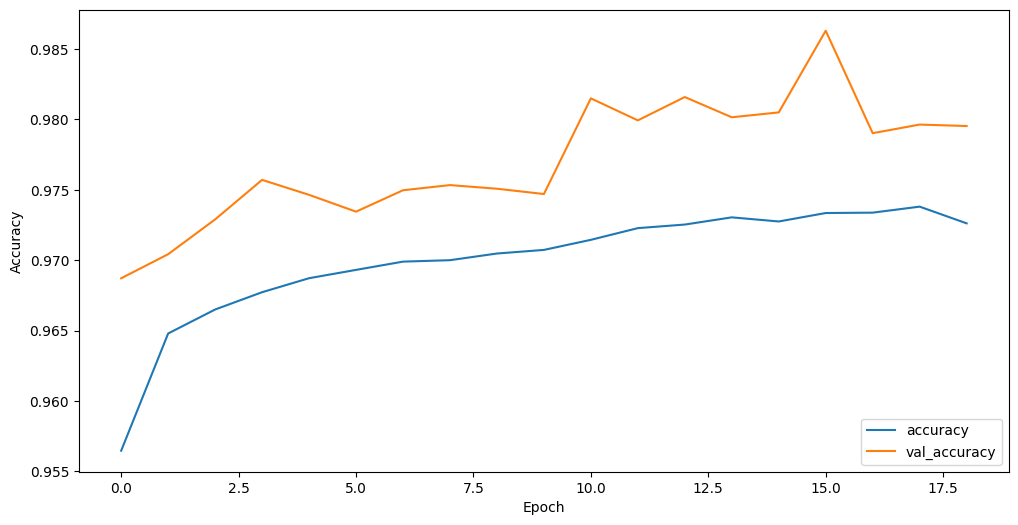

In [19]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [24]:
# GridSearchCV for Hyperparameter Tuning
!pip install scikeras
from scikeras.wrappers import KerasClassifier

def create_model():
    model = Sequential()
    model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(np.unique(y)), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

In [25]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'batch_size': [32, 64],
    'epochs': [10, 20],
    'dropout_rate': [0.3, 0.4, 0.5]
}

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")